In [1]:
import pandas as pd
from common.outliers import *
from common.clustering import *
from common.standardization import *
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [2]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Data stats for each column

In [3]:
columns_to_get_stats_from = ["Global_Sales", "User_Score", "Critic_Score",
                             "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_to_get_stats_from})
print(columns_stats.to_string())

        Global_Sales    User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max        82.530000  9.600000e+00     99.000000  28.960000  41.360000  10.220000      2016.000000
min         0.010000  8.881784e-16     13.000000   0.000000   0.000000   0.000000      1977.000000
std         1.904295  1.302502e+00     12.449681   0.622661   1.002670   0.385861         6.070377
mean        0.810365  7.270068e+00     70.942011   0.225307   0.402908   0.108312      2006.003636
median      0.360000  7.500000e+00     72.400000   0.070000   0.170000   0.000000      2007.000000


### Data standardization

In [4]:
columns_to_standardize = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales",
                          "NA_Sales", "JP_Sales", "Year_of_Release"]
standardize(data, columns_to_standardize, columns_stats)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii        -0.000599   
1                              Super Mario Bros.      NES        -3.460022   
2                                 Mario Kart Wii      Wii         0.328870   
3                              Wii Sports Resort      Wii         0.493604   
4                       Pokemon Red/Pokemon Blue       GB        -1.647943   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2        -0.000599   
10448                                    Deus Ex       PC        -0.989005   
10449                  Monster Rancher Advance 2      GBA        -0.659537   
10450                              Karnaaj Rally      GBA        -0.494802   
10451                Wade Hixton's Counter Punch      GBA        -0.330068   

              Genre   NA_Sales   EU_Sales   JP_Sales  Global_Sa

### Outliers - 1D

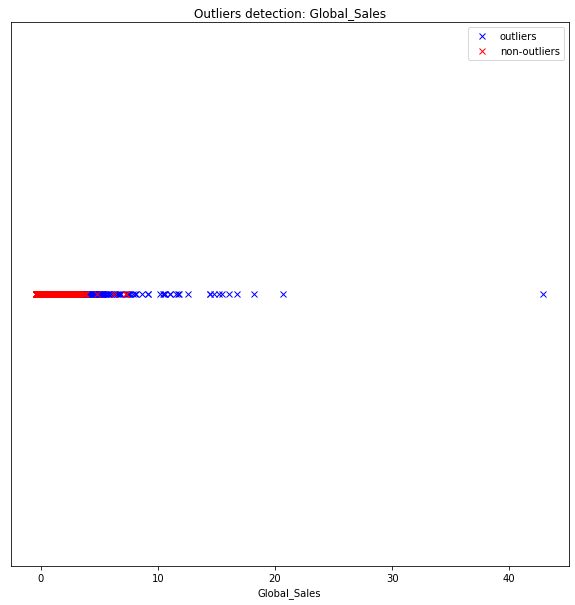

Outliers according to column Global_Sales
Wii Sports: 42.91332813369049
Super Mario Bros.: 20.705634016604392
Mario Kart Wii: 18.22702639701001
Wii Sports Resort: 16.782922381356506
Nintendogs: 12.529379644340723
Pokemon Red/Pokemon Blue: 16.047742155205633
Tetris: 15.46484926161458
Pokemon Diamond/Pokemon Pearl: 9.158053178705993
Super Mario Bros. 3: 8.648678307730028
New Super Mario Bros.: 15.22329004445072
Super Mario Land: 9.100289018079852
Kinect Adventures!: 11.027511468061078
Wii Fit Plus: 11.017008893401778
Brain Age: Train Your Brain in Minutes a Day: 10.155797771339323
Wii Play: 14.761176759441597
Duck Hunt: 14.440848232333002
New Super Mario Bros. Wii: 14.44609951966265
Mario Kart DS: 11.762691694211954
Wii Fit: 11.49487604039985
Grand Theft Auto V: 10.623162343678095
Super Mario World: 10.397356988503184
Grand Theft Auto V: 8.118298287435469
Pokemon Ruby/Pokemon Sapphire: 7.897744219590206
Pokemon Gold/Pokemon Silver: 11.704927533585813
Call of Duty: Black Ops II: 6.8159790

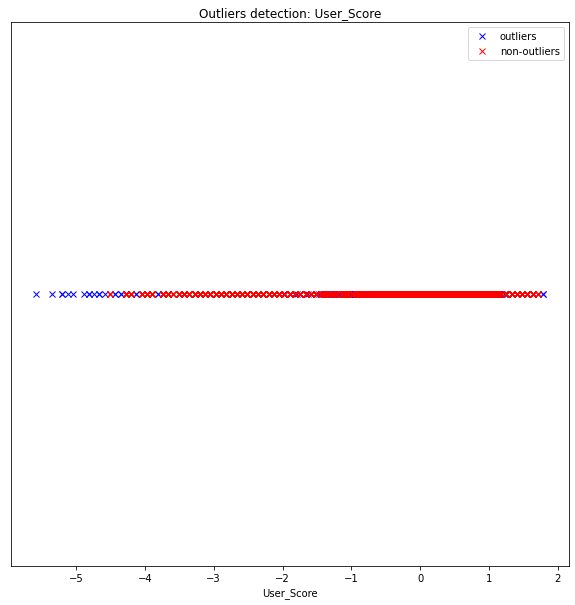

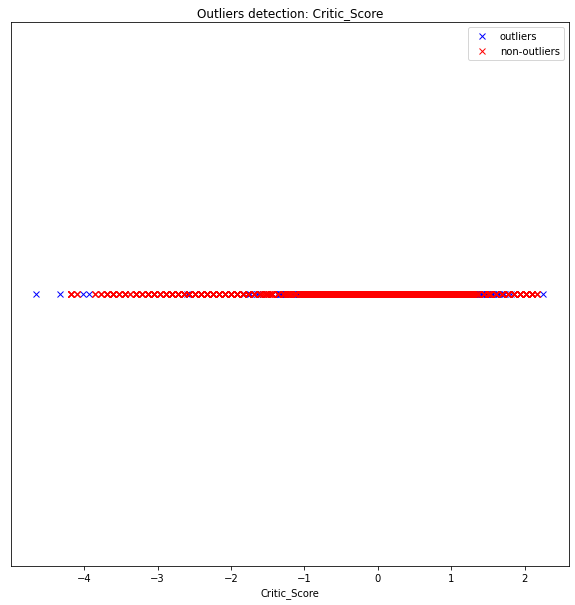

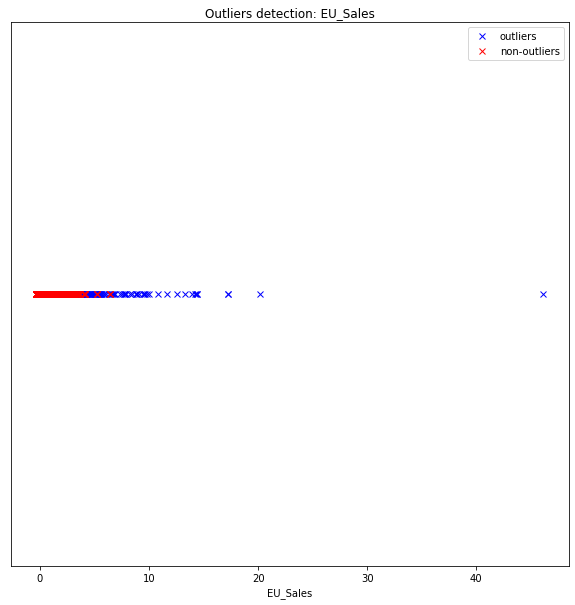

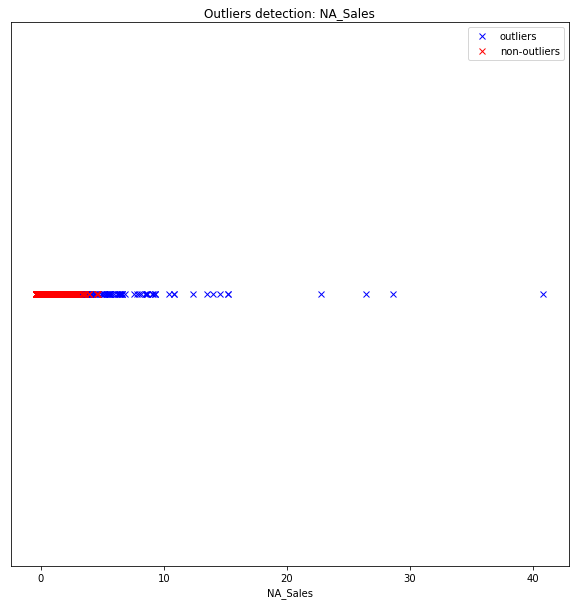

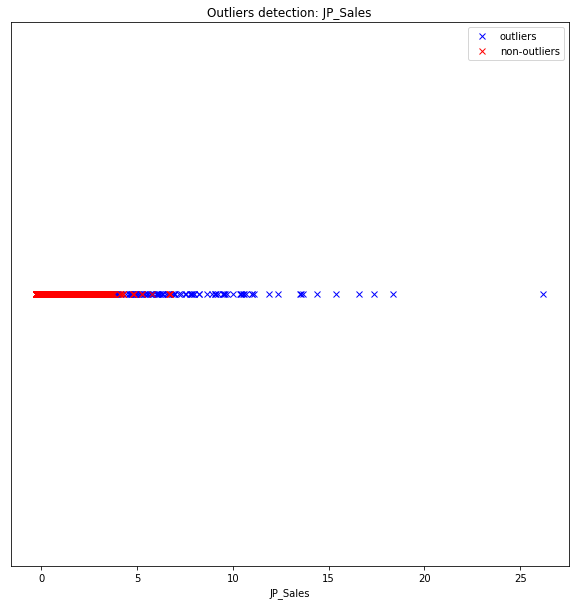

In [5]:
r_percentage = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
k_neighbours = [2, 2, 2, 2, 2, 2]
nearest_neighbours_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
outliers_for_each_column = []
for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])
    outliers_for_each_column.append(outliers)
    plot_1d_data_with_outliers(outliers, non_outliers, column)
    pretty_print_1d_outliers(outliers, column)

### Clustering 1D (K-means)

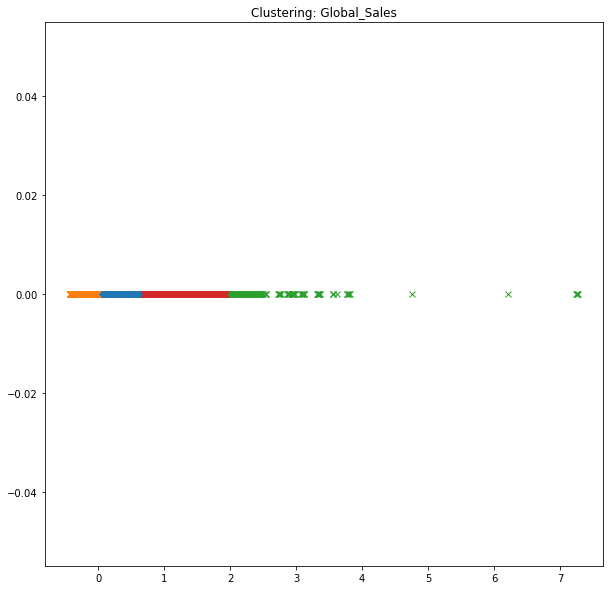

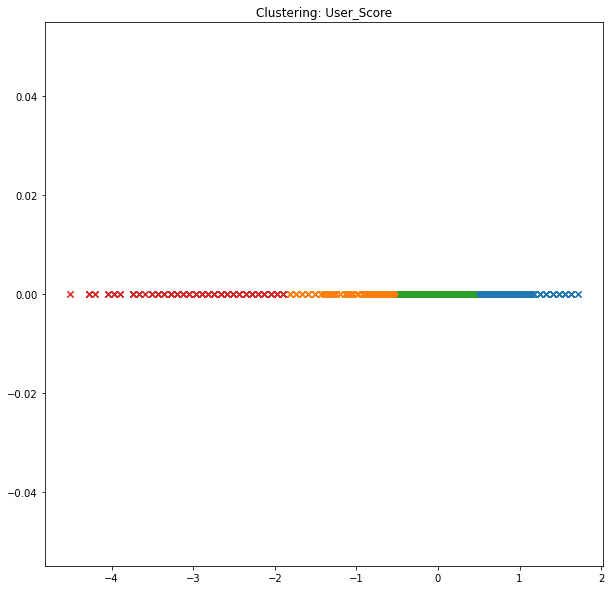

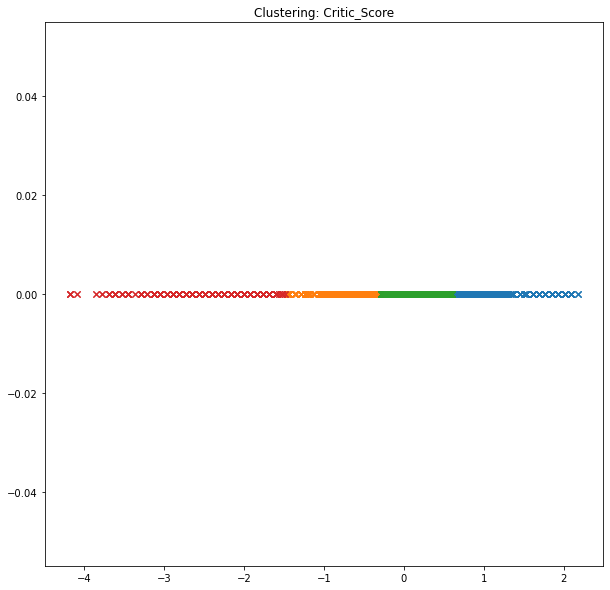

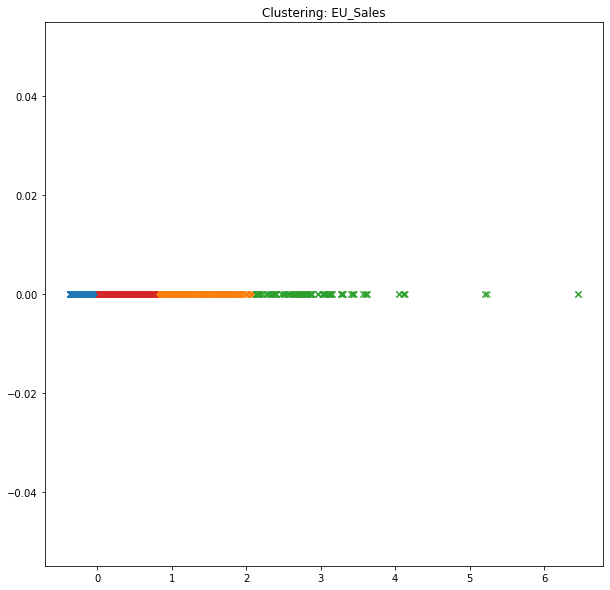

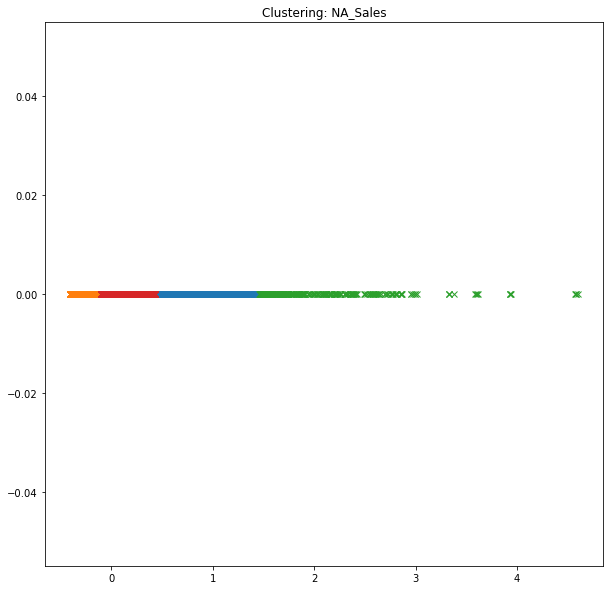

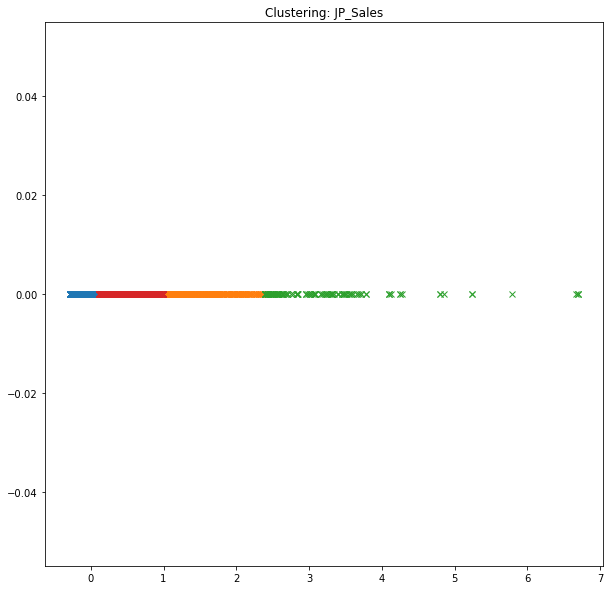

In [6]:
numbers_of_clusters = [4, 4, 4, 4, 4, 4]
k_means_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
for index, column in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_column[index])
    clusters = k_means_1d_clustering(data_without_outliers, column, numbers_of_clusters[index])
    plt.figure()
    plt.title("Clustering: {}".format(column))
    for cluster in clusters:
        plt.plot(cluster[column], np.zeros_like(cluster[column]), 'x')

### Outliers - 2D

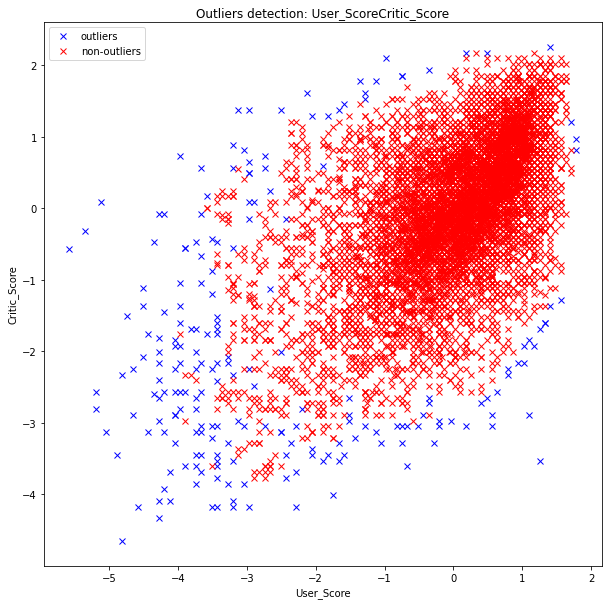

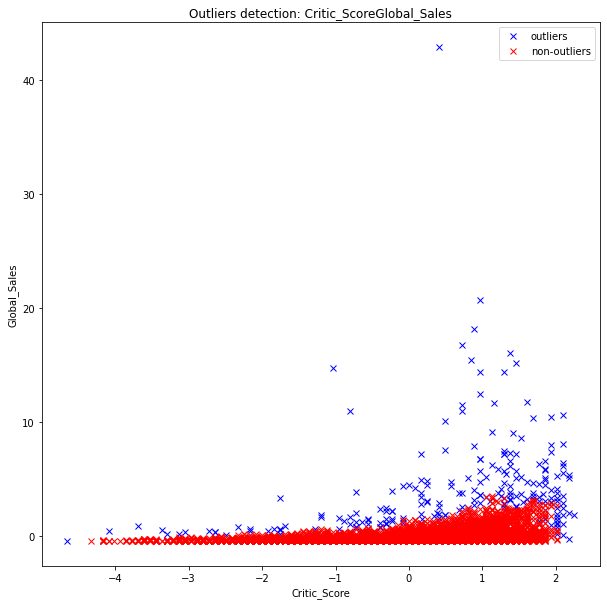

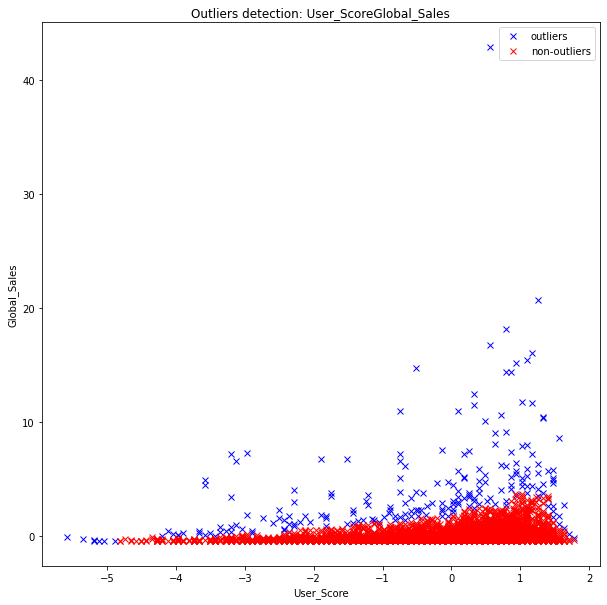

In [7]:
k_neighbours = 5
r_percentage = 0.02
nearest_neighbours_columns = [["User_Score", "Critic_Score"],
                              ["Critic_Score", "Global_Sales"],
                              ["User_Score", "Global_Sales"]]
outliers_for_each_pair = []
for column_pair in nearest_neighbours_columns:
    outliers, non_outliers = find_outliers_in_multiple_columns(data, column_pair, k_neighbours, r_percentage)
    outliers_for_each_pair.append(outliers)
    plot_2d_data_with_outliers(outliers, non_outliers, column_pair)

### Clustering 2D (K-means)

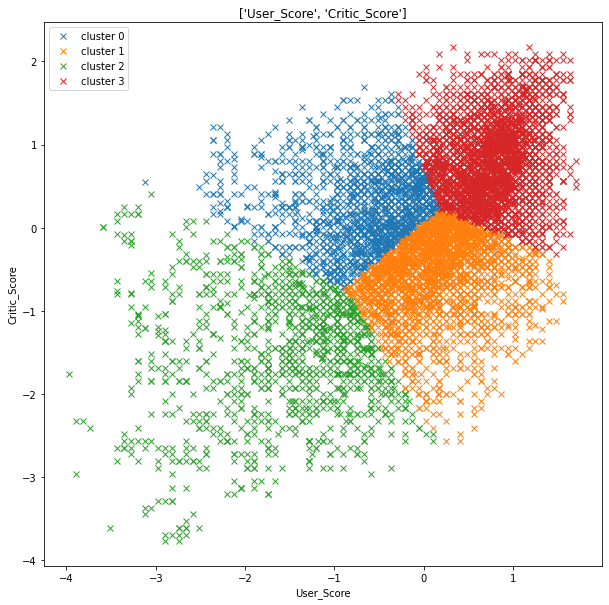

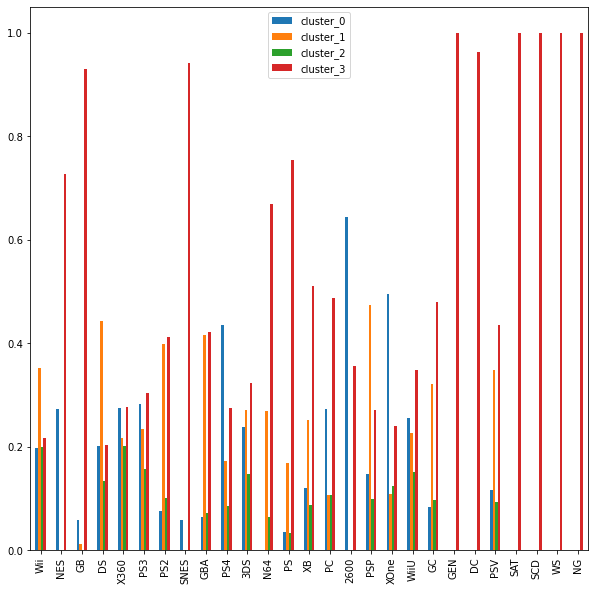

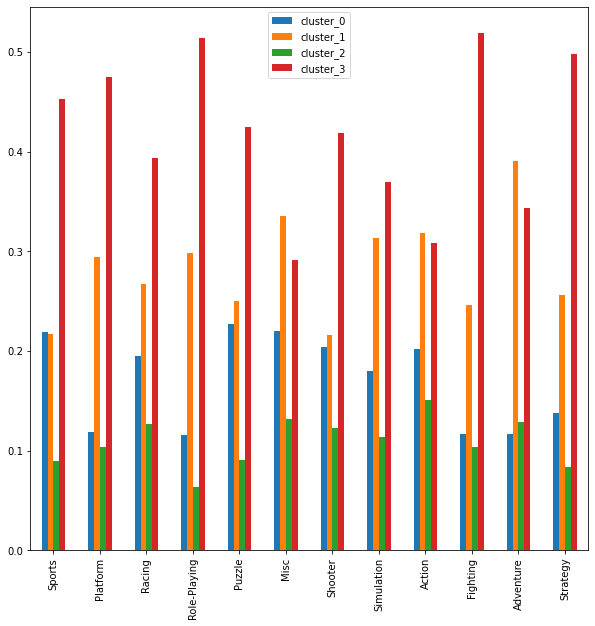

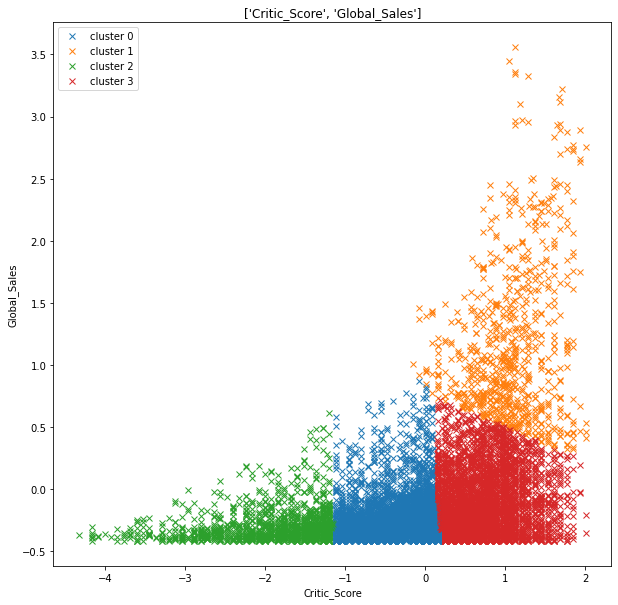

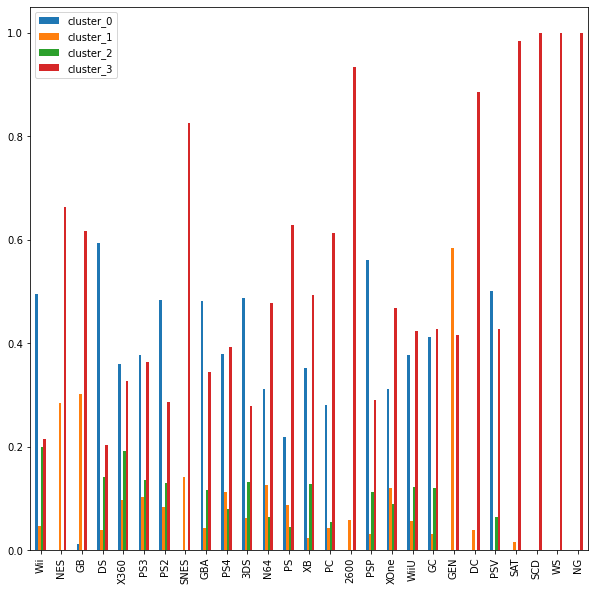

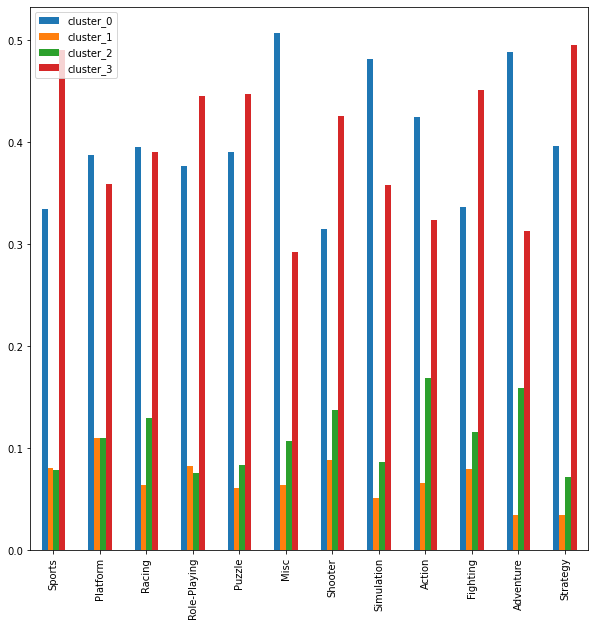

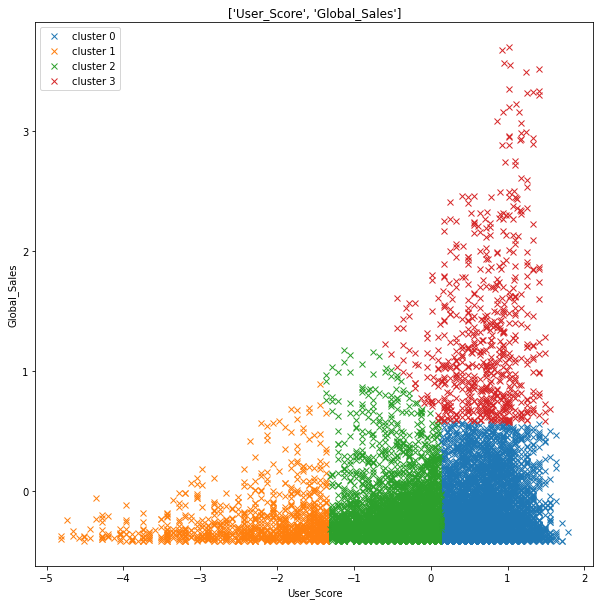

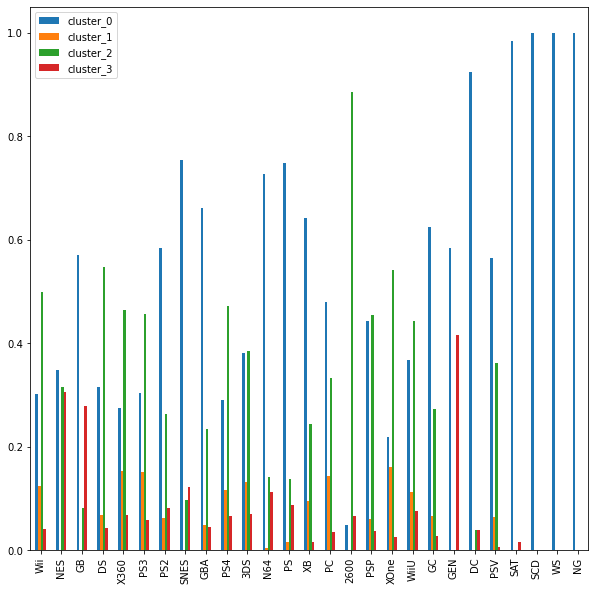

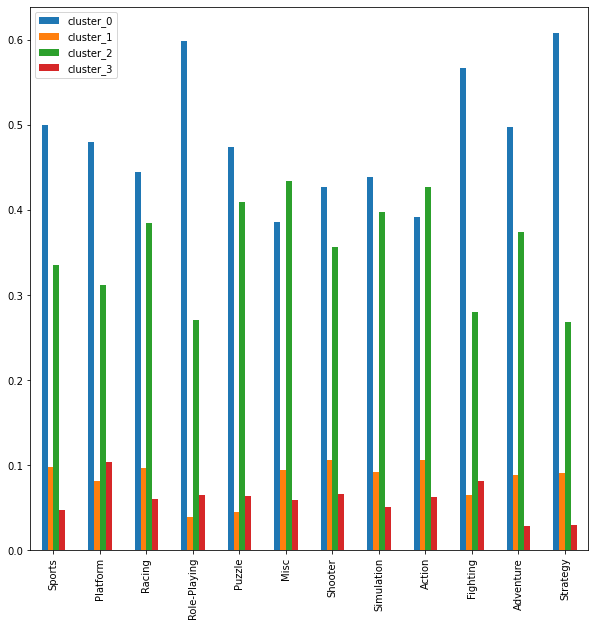

In [8]:
columns_to_analyze = ["Platform", "Genre"]
numbers_of_clusters = [4, 4, 4, 4, 4]
k_means_columns = [["User_Score", "Critic_Score"],
                   ["Critic_Score", "Global_Sales"],
                   ["User_Score", "Global_Sales"]]

for index, column_pair in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_pair[index])
    clusters = k_means_multiple_dim_clustering(data_without_outliers, column_pair, numbers_of_clusters[index])
    plot_2d_data_with_clusters(clusters, column_pair)

    for column_to_analyze in columns_to_analyze:
        unique_values = data[column_to_analyze].unique()
        temp_data = pd.DataFrame(index=unique_values)
        for i, cluster in enumerate(clusters):
            number_of_entries_by_analyzed = cluster.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            total_number_of_entries_by_analyzed = data.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
            temp_data["cluster_{}".format(i)] = number_of_entries_by_analyzed / total_number_of_entries_by_analyzed
        temp_data.plot.bar()

### Outliers all

In [9]:
k_neighbours = 5
r_percentage = 0.02
nearest_neighbours_columns = ["User_Score", "Critic_Score", "NA_Sales", "EU_Sales", "JP_Sales"]
outliers, non_outliers = find_outliers_in_multiple_columns(data, nearest_neighbours_columns, k_neighbours, r_percentage)

### Clustering all

        User_Score  Critic_Score  NA_Sales  EU_Sales  JP_Sales
max       1.788812      2.173388  1.532999  1.838389  2.336821
min      -1.589301     -0.878899 -0.401835 -0.361846 -0.280703
std       0.447975      0.478055  0.304197  0.294109  0.414403
mean      0.601206      0.597308 -0.127860 -0.138315 -0.081101
median    0.637183      0.566921 -0.222314 -0.265485 -0.280703
        User_Score  Critic_Score  NA_Sales  EU_Sales  JP_Sales
max      -0.207345      0.888215  1.193905  1.436886  0.807772
min      -5.197739     -4.332803 -0.401835 -0.361846 -0.280703
std       0.942626      0.952870  0.210515  0.206595  0.082210
mean     -2.083149     -1.759173 -0.237017 -0.231258 -0.263260
median   -1.896402     -1.762456 -0.302101 -0.313665 -0.280703
        User_Score  Critic_Score  NA_Sales  EU_Sales  JP_Sales
max       1.558486      1.611125  1.572893  1.854449  1.896248
min      -2.433829     -3.047629 -0.401835 -0.361846 -0.280703
std       0.583968      0.605797  0.220083  0.249132  0

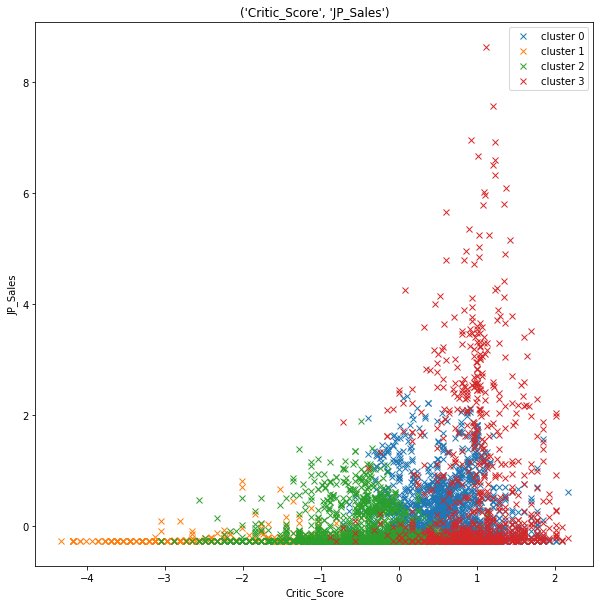

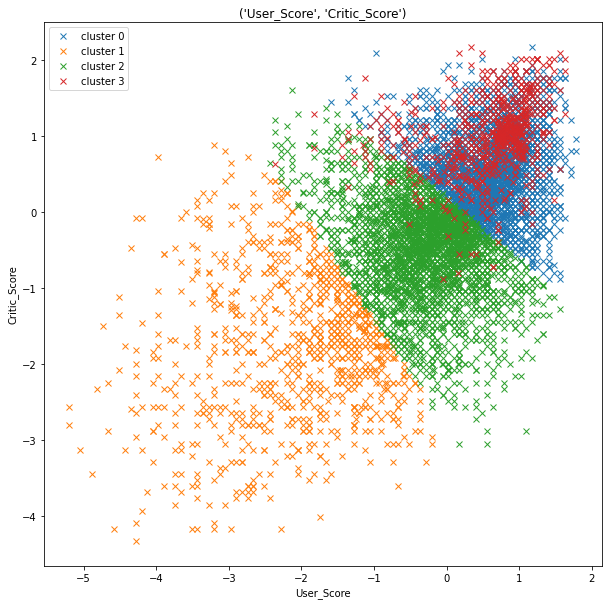

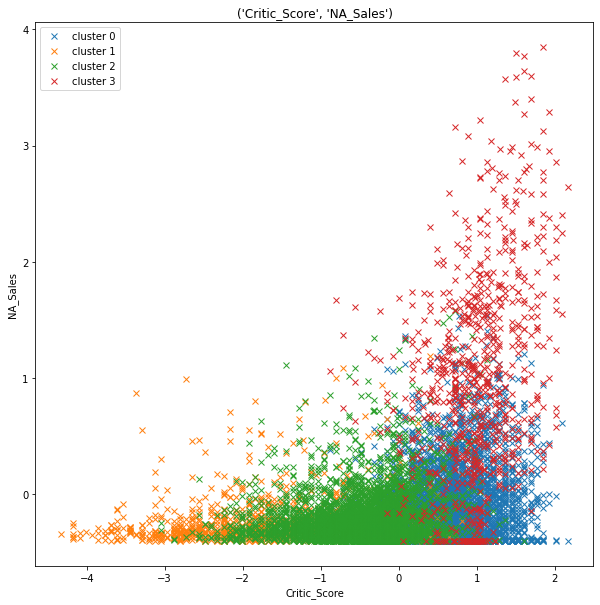

In [10]:
k_means_columns  = ["User_Score", "Critic_Score", "NA_Sales", "EU_Sales", "JP_Sales"]
data_without_outliers = drop_outliers_from_dataset(data, outliers)
clusters = k_means_multiple_dim_clustering(data_without_outliers, k_means_columns, 4)
plot_2d_data_with_clusters(clusters, ("Critic_Score", "JP_Sales"))
plot_2d_data_with_clusters(clusters, ("User_Score", "Critic_Score"))
plot_2d_data_with_clusters(clusters, ("Critic_Score", "NA_Sales"))

stats_to_compute = ["max", "min", "std", "mean", "median"]
for cluster in clusters:
    stats = cluster.agg({item: stats_to_compute for item in k_means_columns})
    print(stats.to_string())

### Idea for classification that could work
We could try to divide for example the NA_Sales into some intervals. Then, using scores and sales data from
other regions, we could try to predict how the game will perform in NA.

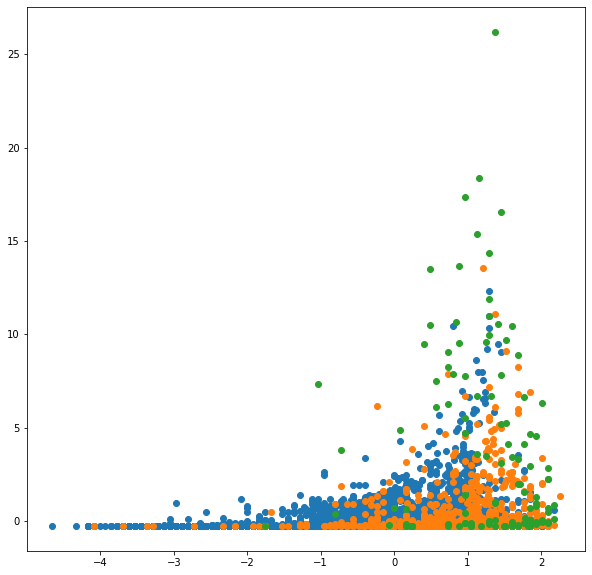

In [11]:
data.loc[data["NA_Sales"] > 0.5, "Sales_t"] = 1
data.loc[data["NA_Sales"] < 0.5, "Sales_t"] = 0
data.loc[data["NA_Sales"] > 3, "Sales_t"] = 2
d1 = data[data["Sales_t"] == 0]
d2 = data[data["Sales_t"] == 1]
d3 = data[data["Sales_t"] == 2]

plt.figure()
plt.scatter(d1["Critic_Score"], d1["JP_Sales"])
plt.scatter(d2["Critic_Score"], d2["JP_Sales"])
plt.scatter(d3["Critic_Score"], d3["JP_Sales"])
plt.show()